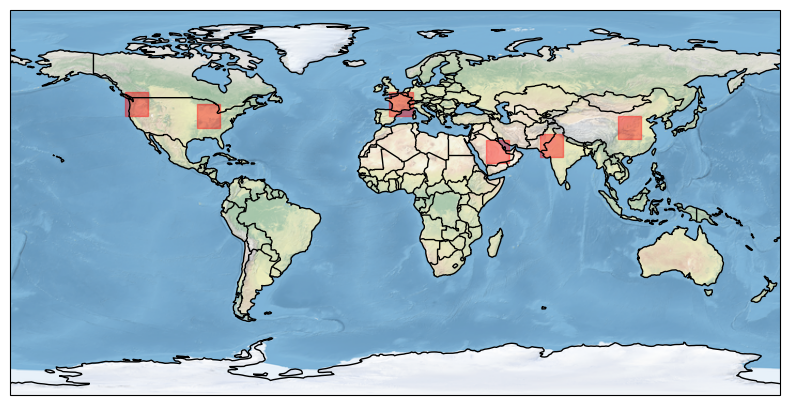

In [1]:
import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# import latitude and longitude of the PLASIm grid
var = 'tas'
DIR = f'../../data/{var}/100_gaussian.nc'

# read netdcdf file and extract latitude and longitude
ds = nc.Dataset(DIR)
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]

# Create a figure and add a map projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.stock_img()




# Chicago - lat = 41, lon = -88
# China - lat=34.00, lon=109.00
# India - lat=27, lon=72
# NW US - lat=45, lon=-120
# Saudi - lat=25, lon=47
# Europe - lat=46, lon=6

# Define the latitude and longitude bounds for the box (e.g., over Europe)
lon_min, lon_max = -10, 40  # Longitude bounds
lat_min, lat_max = 35, 70   # Latitude bounds

lat_arr = [41, 34, 27, 45, 25, 46]
lon_arr = [-88, 109, 72, -120, 47, 3]

for count in range(0, len(lat_arr)):
    # Create a red transparent rectangle patch

    # Find the closest grid point in latitude and longitude
    lat_idx = np.abs(lats - lat_arr[count]).argmin()
    lon_idx = np.abs(lons - lon_arr[count]%360).argmin()

    lat_center = lats[lat_idx]
    lon_center = lons[lon_idx]

    rect = Rectangle((lon_center-5.4, lat_center-5.4), 10.8, 10.8,
                     linewidth=1, edgecolor='red', facecolor='red', alpha=0.4, transform=ccrs.PlateCarree())

    # Add the rectangle to the plot
    ax.add_patch(rect)

# # Create a red transparent rectangle patch
# rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
#                  linewidth=1, edgecolor='red', facecolor='red', alpha=0.4, transform=ccrs.PlateCarree())

# # Add the rectangle to the plot
# ax.add_patch(rect)

# Set the extent of the map
ax.set_extent([-180, 180, -90, 90])

# Show the plot
plt.show()
